# Plot instability threshold

In [1]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import pandas as pd

mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['xtick.minor.size'] = 3.5
mpl.rcParams['ytick.minor.size'] = 3.5
mpl.rcParams['xtick.major.width'] = 1.1
mpl.rcParams['ytick.major.width'] = 1.1
mpl.rcParams['xtick.minor.width'] = .8
mpl.rcParams['ytick.minor.width'] = .8
mpl.rcParams['legend.fontsize'] = 14
#xtick.major.size     : 3.5      # major tick size in points
#xtick.minor.size     : 2      # minor tick size in points
#xtick.major.width    : 0.8    # major tick width in points
#xtick.minor.width    : 0.6    # minor tick width in points
%matplotlib inline

In [2]:
result_db_file = 'data/alfven_instability.csv'
column_list = ['betap', 'vcva', 'tctp', 'thtc', 'vac', 
               'max_growth_rate', 'kz_peak', 'kp_peak', 'theta_peak']
if os.path.exists(result_db_file):
    df = pd.read_csv(result_db_file)
else:
    df = pd.DataFrame(columns= column_list)

In [4]:
df.head()

,betap,vcva,tctp,thtc,vac,max_growth_rate,kz_peak,kp_peak,theta_peak
0,0.1,1.0,2,6,0.0001,0.000031,0.157,0.270,59.9
1,0.1,1.2,2,6,0.0001,0.000528,0.163,0.393,67.5
2,0.1,1.3,2,6,0.0001,0.000906,0.161,0.445,70.1
3,0.1,1.4,2,6,0.0001,0.001390,0.164,0.481,71.1
4,0.1,1.8,2,6,0.0001,0.004380,0.153,0.745,78.4


In [50]:
betap_arr = df.betap.unique()
vcva_arr = np.zeros_like(betap_arr)
target_gamma = 1e-3

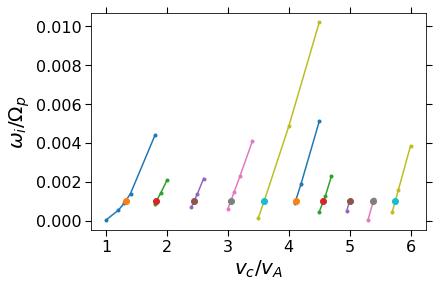

In [51]:
for i, betap in enumerate(betap_arr):
    vc_gamma = df[df.betap == betap][['vcva', 'max_growth_rate']]
    vc = vc_gamma.vcva.get_values()
    gamma = vc_gamma.max_growth_rate.get_values()
    # interpolate drift-growth rate curve
    f = scipy.interpolate.interp1d(gamma, vc, kind='slinear')
    plt.plot(vc, gamma, 'o-', markersize = 3)
    plt.plot(f(target_gamma), target_gamma, 'o')
    vcva_arr[i] = f(target_gamma)
plt.xlabel(r'$v_c/v_A$')
plt.ylabel(r'$\omega_i/\Omega_p$')

(0, 5)

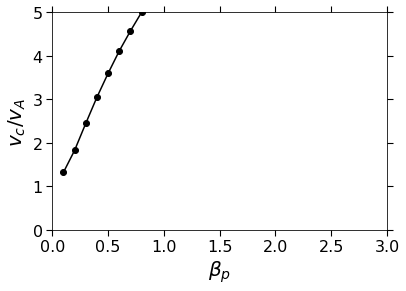

In [59]:
plt.plot(betap_arr, vcva_arr, 'ko-')
plt.xlabel(r'$\beta_p$')
plt.ylabel(r'$v_c/v_A$')
plt.xlim([0, 3])
plt.ylim([0, 5])

In [64]:
np.save('data/alfven_instability_threhold_tctp=2_thtc=6_vac=0.0001', np.array([betap_arr, vcva_arr]))